# Ford GoBike System Data
## by Jessica Stow

## Introduction
> This dataset includes information about individual rides made in a bike-sharing system 'Ford GoBike' covering the greater San Francisco Bay area for 2019. The aim of this project is to produce visualisations through exploratory data analysis and visualisation. 

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
df.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,2019-02-01 00:17:32.2580,2019-02-01 00:19:34.9380,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,2019-02-01 00:15:12.0670,2019-02-01 00:19:21.6990,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,2019-02-01 00:12:50.5540,2019-02-01 00:17:07.3620,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.isnull().sum() # Check for NaNs

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
sum(df.duplicated()) # check for duplicate samples

0

In [9]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [10]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [11]:
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

#### Tidiness issues
- no column for time of day, weekday, months and ages

#### Quality problems 
- erroneous data types (start_time, end_time, bike_id, start_station_id, member_gender, end_station_id, user_type, member_gender, bike_share_for_all)
- NaN values for start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender
- member_birth_year includes dates from late 1890s and early 1900s - seems improbable. 

### Wrangling

In [12]:
df_clean = df.copy() # save duplicate copy

#### Define
Change erroneous data types to correct types and drop null values

#### Code

In [13]:
# to datetime
df_clean['start_time'] = df_clean['start_time'].dropna().astype('datetime64[ns]')
df_clean['end_time'] = df_clean['end_time'].dropna().astype('datetime64[ns]')

# to object
df_clean['bike_id'] = df_clean['bike_id'].dropna().astype(str)
df_clean['start_station_id'] = df_clean['start_station_id'].dropna().astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].dropna().astype(str)

# to categorical 
df_clean['user_type'] = df_clean['user_type'].dropna().astype('category')
df_clean['member_gender'] = df_clean['member_gender'].dropna().astype('category') 
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].dropna().astype('category') 

# to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].dropna().astype(int) 
df_clean['start_station_name'] = df_clean['start_station_name'].dropna()

# drop null values 
df_clean = df_clean[df_clean['start_station_id'].notna()] 
df_clean = df_clean[df_clean['start_station_name'].notna()] 
df_clean = df_clean[df_clean['member_birth_year'].notna()] 
df_clean = df_clean[df_clean['member_gender'].notna()]  

#### Check

In [14]:
df_clean.info() # correct datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [15]:
df_clean.isnull().sum() # No more null values

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Define
Create columns for hour of day (start_time_hour, end_time_hour), day of week (start_time_weekday, end_time_weekday) and month of year (start_time_month, end_time_month)

#### Code

In [16]:
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour.astype('category')
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour.astype('category')

df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%A').astype('category')
df_clean['end_time_weekday'] = df_clean['end_time'].dt.strftime('%A').astype('category')

df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B').astype('category')
df_clean['end_time_month'] = df_clean['end_time'].dt.strftime('%B').astype('category')

df_clean['duration_minute'] = df_clean['duration_sec']/60

#### Check

In [17]:
df_clean.start_time_hour.unique()

[17, 12, 23, 22, 21, ..., 6, 4, 3, 2, 1]
Length: 24
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [18]:
df_clean.end_time_hour.unique()

[8, 5, 4, 0, 23, ..., 7, 6, 3, 2, 1]
Length: 24
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [19]:
df_clean.start_time_weekday.unique()

['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [20]:
df_clean.end_time_weekday.unique()

['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [21]:
df_clean.start_time_month.unique()

['February']
Categories (1, object): ['February']

In [22]:
df_clean.end_time_month.unique()

['March', 'February']
Categories (2, object): ['February', 'March']

#### Define
Create column for ages and drop unreasonable ages (ages > 80 years)

#### Code

In [23]:
df_clean['age'] = 2019 - df_clean.member_birth_year
df_clean.drop(df_clean[(df_clean.age > 90 )].index, inplace = True) # dropping age > 90 

#### Check

In [24]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_minute,age
count,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000
mean,704.028009,37.771206,-122.351758,37.771401,-122.351334,1984.839726,11.733800,34.160274
std,1642.537925,0.100409,0.117748,0.100314,0.117311,9.968641,27.375632,9.968641
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1930.000000,1.016667,18.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.383333,27.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,8.500000,32.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,13.150000,39.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1409.133333,89.000000


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174875 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174875 non-null  int64         
 1   start_time               174875 non-null  datetime64[ns]
 2   end_time                 174875 non-null  datetime64[ns]
 3   start_station_id         174875 non-null  object        
 4   start_station_name       174875 non-null  object        
 5   start_station_latitude   174875 non-null  float64       
 6   start_station_longitude  174875 non-null  float64       
 7   end_station_id           174875 non-null  object        
 8   end_station_name         174875 non-null  object        
 9   end_station_latitude     174875 non-null  float64       
 10  end_station_longitude    174875 non-null  float64       
 11  bike_id                  174875 non-null  object        
 12  user_type       

#### Define
Drop columns irrelevant to this data analysis/visualisation

#### Code

In [26]:
df_clean.drop(columns=['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 
                 'end_station_longitude', 'bike_id', 'bike_share_for_all_trip', 'member_birth_year', 
                 'start_time_month', 'end_time_month', 'end_time_hour', 'end_time_weekday'] , inplace=True)

#### Check

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174875 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          174875 non-null  datetime64[ns]
 1   end_time            174875 non-null  datetime64[ns]
 2   start_station_id    174875 non-null  object        
 3   start_station_name  174875 non-null  object        
 4   end_station_id      174875 non-null  object        
 5   end_station_name    174875 non-null  object        
 6   user_type           174875 non-null  category      
 7   member_gender       174875 non-null  category      
 8   start_time_hour     174875 non-null  category      
 9   start_time_weekday  174875 non-null  category      
 10  duration_minute     174875 non-null  float64       
 11  age                 174875 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(2), object(4)
memory usage: 12.7+ MB


## Store data

In [53]:
df_clean.to_csv('df_clean.csv', index = False)

### What is the structure of your dataset?

> This dataset provides information on Ford GoBike System, a bike-sharing system, which govers the greater San Francisco Bay area. The dataset only contains rental information for the period of February and March 2019. The final dataset contains 11 columns (start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, user_type, member_gender, start_time_hour, start_time_weekday, duration_minute, age) with 174 875 rows. 

### What is/are the main feature(s) of interest in your dataset?

> We are interested investigating the relationships between frequency of bike rentals and gender, user type, trip duration and age, as well as the relationship between these variables. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The trip duration (duration_sec), gender (member_gender), member age (age) and user type (subscriber or customer) and the days and times trips are taken (start_time_hour, start_time_weekday). 

## Univariate Exploration

#### Question
On which day of the week are most bikes rented?

#### Visualisation 

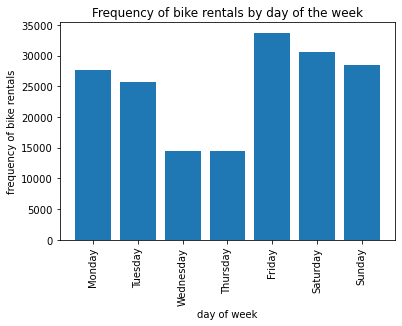

In [28]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Return the frequency count of each weekday
weekday_freq = df_clean['start_time_weekday'].value_counts(sort=False)

plt.bar(weekday, weekday_freq)

# Labeling the axes
# define and repeat for 
plt.xlabel('day of week')
plt.ylabel('frequency of bike rentals')
plt.xticks(rotation=90)
plt.title('Frequency of bike rentals by day of the week')

# Dsiplay the plot
plt.show()

#### Observations
- most bike rentals occur on Fridays, followed by Saturdays then Sundays.
- the least popular days for bike rentals are Wednesdays and Thursdays.

#### Question
At what time of day are most bikes rented?

#### Visualisation 

/Users/jessicastow/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='start_time_hour', ylabel='Density'>

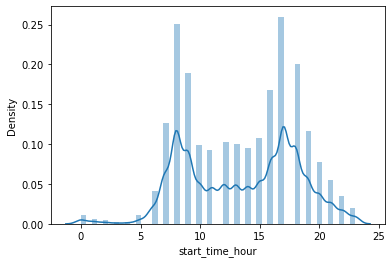

In [29]:
sb.distplot(df_clean['start_time_hour'], kde=True)

#### Observations
- there are two peaks during the 24-hour day where a high amount of bike rentals take place, in the morning, between 7am and 9am, and in the evening, between 4pm and 7pm. 

#### Question 
Which genders rent bikes most frequently?

#### Visualisation

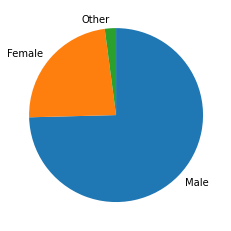

In [30]:
sorted_counts = df_clean['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,);

#### Observations
- most of the bike rentals (approximately 75%) are rented by males, followed by females (about 20%) and other (about 5%)

#### Questions
What are the proportions of user types?

#### Visualisations

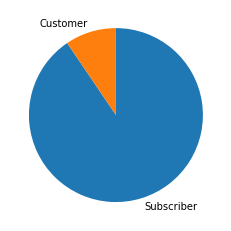

In [31]:
sorted_counts = df_clean['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

#### Observations
- most users (about 90%) are subscribers

#### Question
What is the distribution of ages using Ford GoBike systems?

#### Visualisation

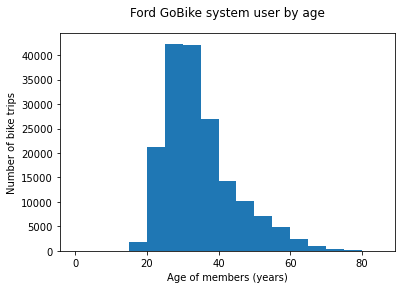

In [32]:
bin_edges = np.arange(0, 90, 5)
plt.hist(data = df_clean, x = 'age', bins = bin_edges);
plt.title("Ford GoBike system user by age", y=1.05)
plt.xlabel('Age of members (years)')
plt.ylabel('Number of bike trips');

#### Observations
- most rentals are done by users in the 25 to 35 year old age group

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My distributions supported the idea that most bike rentals occur in the mornings and evenings, around the times the work day starts and ends. 
> I also noted that most bike rentals are done by males
> The ages that most frequently rented bikes were between 25 and 35 years old 
> Moster users are subscribers
> Most rentals occur on Fridays, Saturdays and Sundays.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Before plotting the age distributions I removed people that were above 90 years in age as it seems unlikely that this age group would be able to ride bikes. 

## Bivariate Exploration

#### Question
Does user type have an influence on days of week when rentals take place?

#### Visualisation

<AxesSubplot:xlabel='start_time_weekday', ylabel='count'>

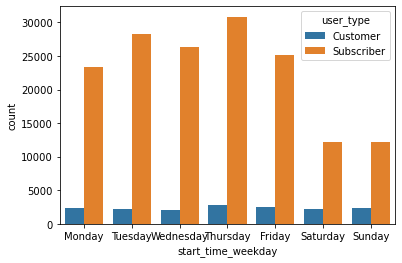

In [33]:
sb.countplot(data= df_clean, x = 'start_time_weekday', order=weekday, hue = 'user_type')

#### Observations
- user type does have an influence, most bikes are rented by subscribers on Thursdays, followed by Tuesdays.
- most customers rent bikes on Thursdays although this is not significantly greater than other days

#### Question
Does gender have an influence on days of week when rentals take place?

#### Visualisation

<AxesSubplot:xlabel='start_time_weekday', ylabel='count'>

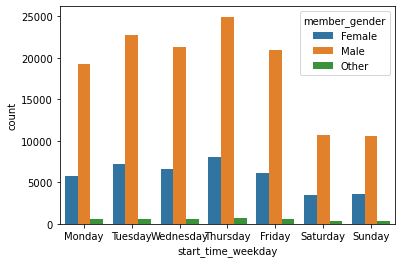

In [34]:
sb.countplot(data= df_clean, x = 'start_time_weekday', order=weekday, hue = 'member_gender')

#### Observations
- males rent more bikes than any other gender for every day of the week

#### Question 
Does age have an influence on the duration of bike rental?

#### Visualisation

Text(0.5, 1.0, 'aa')

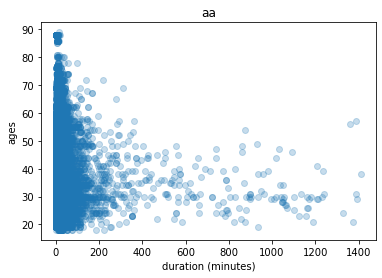

In [54]:
plt.scatter(data=df_clean, x='duration_minute' ,y='age', alpha=5/20);
plt.xlabel('duration (minutes)')
plt.ylabel('ages');
plt.title('Duration (minutes) of bike rentals for different ages')

#### Observations
- for all ages, most rentals occur for less than ± 3 hours (180 minutes).
- Younger ages (<40 years) tend to rent bikes for longer duration than older ages (>40 years)

#### Question 
Does user type have an influence on the duration of bike rental?

#### Visualisation

#### Observations

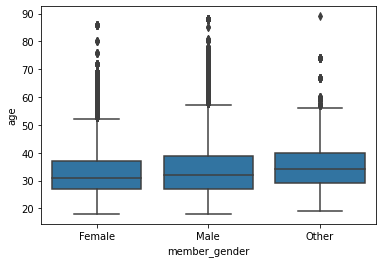

In [36]:
base_color = sb.color_palette()[0]
sb.boxplot(data=df_clean, x='member_gender', y='age', color= base_color);

#### Observations
- females that rent bicycles tend to be younger than both males and 'other' gender types.
- 'other' gender types tend to be older than both females and males
- a wider range of ages of males rent bikes

#### Question
What is the relationship between user type and start hour?

#### Visualisation

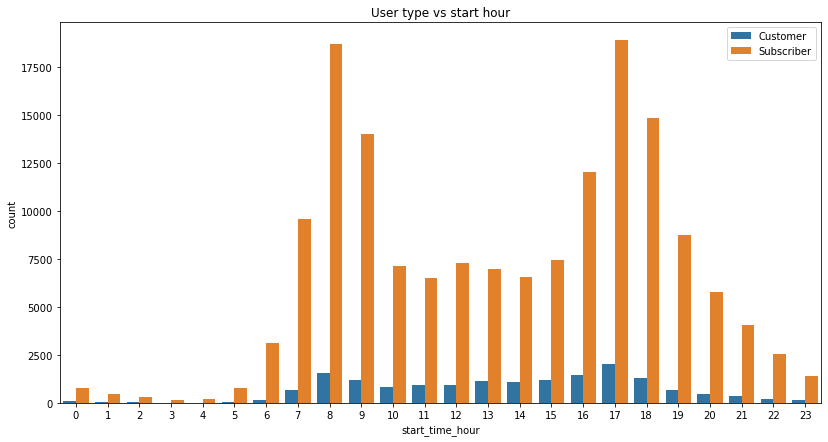

In [37]:
plt.figure(figsize = [30, 7])
plt.subplot(1, 2, 1)
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'user_type')
plt.legend();
plt.title('User type vs start hour');

#### Observations
- most bikes are hired by subscribers at 8am and 5pm
- more subscribers hire bikes

#### Question
What is the relationship between member gender and start hour?

#### Visualisations

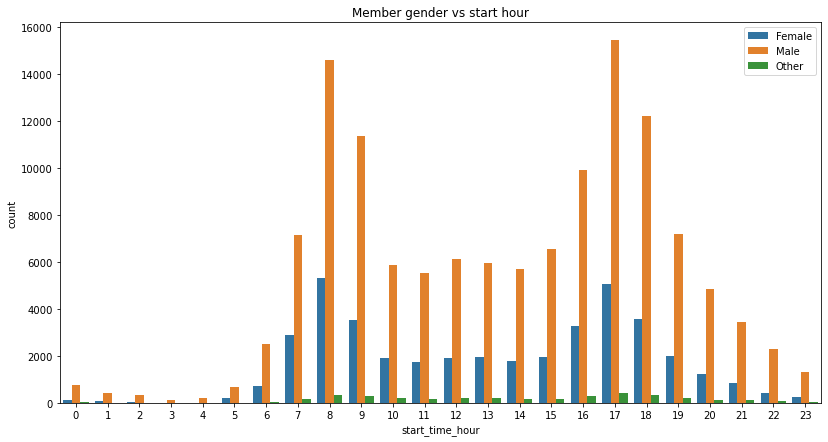

In [38]:
plt.figure(figsize = [30, 7])
plt.subplot(1, 2, 1)
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'member_gender')
plt.legend();
plt.title('Member gender vs start hour');

#### Observations
- Most bikes are rented by men at 8 am and 5pm
- men hire more bikes than women every hour of the day

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For everyday of the week the most bikes are rented by subscribers. Males rent more bikes than any other gender for every day of the week, and this occurs at 8am and 5pm. Females that rent bicycles tend to be younger than both males and 'other' gender types. 'Other' gender types tend to be older than both females and males
a wider range of ages of males rent bikes. Younger ages (<40 years) tend to rent bikes for longer duration than older ages (>40 years)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

#### Question
How does the average trip duration vary between days of the week for each user type?

#### Visualisation

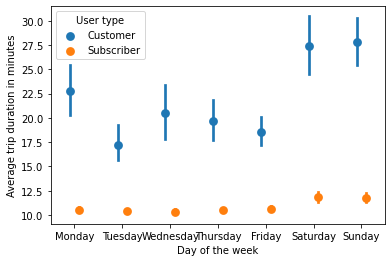

In [62]:
sb.pointplot(data = df_clean, x = 'start_time_weekday', y = 'duration_minute', order=weekday, hue='user_type', dodge=0.2, linestyles="");
plt.xlabel('Day of the week');
plt.ylabel('Average trip duration in minutes');
plt.legend(title='User type')

#### Observations
- customers tend to have longer trip durations throughout the week than subscribers

#### Question
How does the average trip duration vary between days of the week for each gender?

#### Visualisation

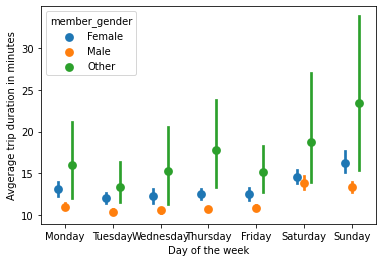

In [44]:
sb.pointplot(data = df_clean, x = 'start_time_weekday', y = 'duration_minute', order=weekday, hue='member_gender', dodge=0.3, linestyles="");
plt.xlabel('Day of the week');
plt.ylabel('Average trip duration in minutes');

#### Observations
- 'other' gender types tend to have longer average trip durations than any other gender for each day of the week

#### Question
what is the relationship between member age and trip duration for each user type?

#### Visualisation

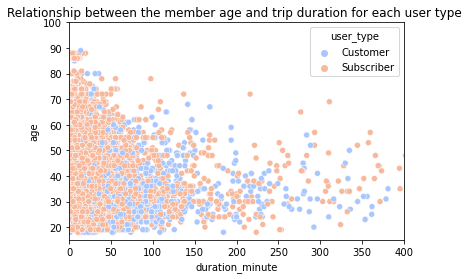

In [52]:
sb.scatterplot(data = df_clean, x = df_clean.duration_minute , y =df_clean.age , hue ='user_type', palette = "coolwarm")
plt.ylim((17,100))
plt.xlim((0,400))
plt.title("Relationship between the member age and trip duration for each user type ")
plt.show()

#### Observations
- For each user type there does not appear to be a difference in the duration or age

#### Question
what is the relationship between member age and trip duration for each gender?

#### Visualisation

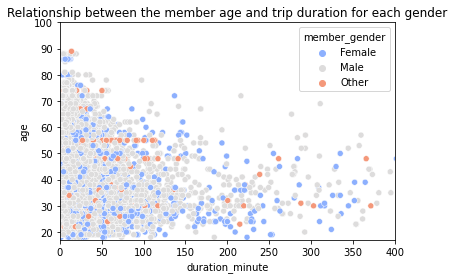

In [49]:
sb.scatterplot(data = df_clean, x = df_clean.duration_minute , y =df_clean.age , hue ='member_gender', palette = "coolwarm")
plt.ylim((17,100))
plt.xlim((0,400))
plt.title("Relationship between the member age and trip duration for each gender")
plt.show()

#### Observations
- For each gender, there does not appear to be a difference between the age and duration of trip

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers tend to have longer trip durations throughout the week than subscribers
> 'other' gender types tend to have longer average trip durations than any other gender for each day of the week
> For each gender, there does not appear to be a difference between the age and duration of trip
> For each user type there does not appear to be a difference in the duration or age. 

### Were there any interesting or surprising interactions between features?

> I found it interesting that the average trip duration was longer on the weekends for subscribers than for customers. 

## Conclusions
> More males than females (and 'other' genders) use Ford GoBike's bike rental system. The most trip occur at 8am and 5pm (the start and end of the work day). The average bike rental is less than 3 hours. Trip durations tend to be longer on the weekends for subscribers, and for 'other' gender types.
